![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
27487,id_803,Copenhagen,"['European', 'Scandinavian', 'Danish', 'Brew P...",804.0,$$ - $$$,208.0,[['Beautiful surrounding and great craft beer....,/Restaurant_Review-g189541-d1104457-Reviews-Br...,d1104457,1,3.5
28957,id_2971,Prague,['Wine Bar'],2978.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274707-d4755648-Reviews-Ca...,d4755648,1,4.0
10174,id_2044,Budapest,['Italian'],2045.0,NaN,5.0,"[[], []]",/Restaurant_Review-g274887-d10498197-Reviews-P...,d10498197,1,3.5
17009,id_10131,Paris,['Caribbean'],10133.0,$$ - $$$,10.0,"[[], []]",/Restaurant_Review-g187147-d11808158-Reviews-F...,d11808158,1,3.5
19459,id_2125,Amsterdam,"['American', 'Fusion', 'European']",2130.0,$$ - $$$,21.0,"[['Nice food, poor location', 'Decent burger. ...",/Restaurant_Review-g188590-d9599081-Reviews-Ta...,d9599081,1,4.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'] = data['Number of Reviews'].fillna(data['Number of Reviews'].median())

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1573
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

Заменим пропуски в признаке Cuisines Style на 'other style', посчитаем какие типы кухонь самые популярные и создадим dummy признаки для 20 самых популярных

In [20]:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: '\'other_style\'' if pd.isnull(x) else x[1:-1])

In [21]:
from collections import Counter
cuisines_count = Counter()
for cuisine in data['Cuisine Style'].str.split(', '):
    cuisines_count += Counter(cuisine)
cuisines_list = cuisines_count.most_common(20)

In [22]:
cuisines_top = []
for i in range (0, len(cuisines_list)):
    cuisines_top.append(cuisines_list[i][0][1:-1])

In [23]:
def find_item(cell):
    if item in cell:
        return 1
    return 0

for item in cuisines_top:
    data[item] = data['Cuisine Style'].apply(find_item)

In [24]:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.split(', ') )


добавим признак количества кухонь для каждого ресторана

In [25]:
data['Cuisine_counts'] = data['Cuisine Style'].apply(lambda x: len(x))

In [26]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Spanish,Pub,Cafe,Fast Food,British,International,Seafood,Japanese,Central European,Cuisine_counts
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,0,2
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,5
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,5
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,1,0,0,6


In [27]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Spanish,Pub,Cafe,Fast Food,British,International,Seafood,Japanese,Central European,Cuisine_counts
6175,id_6175,['Fast Food'],6341.0,$,66.0,"[['very dirty', 'Not interested'], ['11/03/201...",/Restaurant_Review-g187497-d8830076-Reviews-Bu...,d8830076,0,0.0,...,0,0,0,1,0,0,0,0,0,1
40423,id_2019,['French'],2020.0,$$ - $$$,148.0,"[['Comfortable', 'Lovely little restaurant'], ...",/Restaurant_Review-g187265-d1332616-Reviews-Le...,d1332616,1,3.5,...,0,0,0,0,0,0,0,0,0,1
2085,id_2085,"['European', 'Portuguese']",1464.0,$$ - $$$,14.0,"[['Tremendously well done Roasted Chicken'], [...",/Restaurant_Review-g189158-d6852905-Reviews-A_...,d6852905,0,0.0,...,0,0,0,0,0,0,0,0,0,2
21811,id_1127,"['Italian', 'Pizza']",1128.0,$$ - $$$,5.0,"[[], []]",/Restaurant_Review-g189934-d12321557-Reviews-S...,d12321557,1,2.0,...,0,0,0,0,0,0,0,0,0,2
20641,id_3103,['other_style'],3105.0,NaN,12.0,"[['Unique and wonderful', 'Great vegetarian re...",/Restaurant_Review-g187323-d7917841-Reviews-Tu...,d7917841,1,4.5,...,0,0,0,0,0,0,0,0,0,1


#### Возьмем следующий признак "Price Range".

In [28]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [29]:
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
data['Price Range'] = data['Price Range'].replace(to_replace=price_dict)
data['Price Range']=data['Price Range'].fillna(data['Price Range'].median())

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

найдем количество дней меду отзывами

In [30]:
data['rev_dates'] = data.Reviews.apply(lambda x : [0] if pd.isna(x) else x[2:-2].split('], [')[1][1:-1].split("', '"))
data['max_rev_date'] = pd.to_datetime(data['rev_dates'].apply(lambda x: max(x)))
data['first_rev'] = pd.to_datetime(data['rev_dates'].apply(lambda x : x[0]))
data['second_rev'] = pd.to_datetime(data['rev_dates'].apply(lambda x: x[1] if len(x) == 2 else ''))
data['rev_delta'] = np.abs(data['first_rev'] - data['second_rev'])
data['rev_delta'] = data['rev_delta'].apply(lambda x: x.days)

создадим dummy признаки для городов


In [31]:
dummies = pd.get_dummies(data.City, drop_first=True)
data = pd.concat([data, dummies], axis=1) 

AttributeError: 'DataFrame' object has no attribute 'City'

In [32]:
data.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,International,Seafood,Japanese,Central European,Cuisine_counts,rev_dates,max_rev_date,first_rev,second_rev,rev_delta
0,id_0,"['Bar', 'Pub']",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,2,[],NaT,NaT,NaT,NaN
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,5,"[12/05/2017, 10/29/2017]",2017-12-05,2017-12-05,2017-10-29,37.0
2,id_2,['Vegetarian Friendly'],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,1,"[12/28/2017, 12/06/2017]",2017-12-28,2017-12-28,2017-12-06,22.0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,5,"[12/06/2017, 11/22/2017]",2017-12-06,2017-12-06,2017-11-22,14.0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,1,0,0,6,"[02/08/2018, 01/24/2018]",2018-02-08,2018-02-08,2018-01-24,15.0


удалим не нужные признаки

In [33]:
data = data.drop(['Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'max_rev_date', 'rev_dates', 'City', 'first_rev', 'second_rev'], axis = 1)

KeyError: "['City'] not found in axis"

заполним пропуски в признаке количество дней между отзывами медианным значением

In [34]:
df['rev_delta'] = df['rev_delta'].fillna(df['rev_delta'].median())

NameError: name 'df' is not defined

### Посмотрим распределение признака

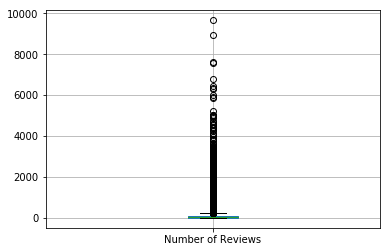

In [35]:
data.boxplot(column=['Number of Reviews'])

найдем медиану, квартили и межквартильный размах

In [36]:
median = data['Number of Reviews'].median()
IQR = data['Number of Reviews'].quantile(0.75) - data['Number of Reviews'].quantile(0.25)
perc25 = data['Number of Reviews'].quantile(0.25)
perc75 = data['Number of Reviews'].quantile(0.75)

25-й перцентиль: 10.0, 75-й перцентиль: 105.0, IQR: 95.0,  Границы выбросов: [-132.5, 247.5].


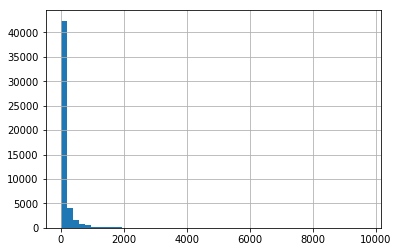

In [37]:
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data['Number of Reviews'].hist(bins = 50)

получается, что верхняя граница выбросов это 247. на гистограмме видно, что в основном количество отзывов от 0 до 2000. посмотрим ближе))

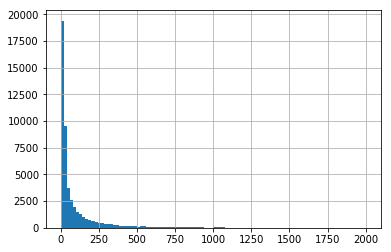

In [38]:
data['Number of Reviews'][data['Number of Reviews'] < 2000].hist(bins = 100)

Видим, что все отзывы находятся в промежутке от 0 до 1000. все что больше, будем считать выбросом и заменим на медианное значение

In [39]:
data['Number of Reviews'] = data['Number of Reviews'].apply(lambda x : median if x>1000 else x)

аналогично рассмотрим признак rev_delta

In [40]:
median_dr = data['rev_delta'].median()
IQR_dr = data['rev_delta'].quantile(0.75) - data['rev_delta'].quantile(0.25)
perc25_dr = data['rev_delta'].quantile(0.25)
perc75_dr = data['rev_delta'].quantile(0.75)

25-й перцентиль: 20.0, 75-й перцентиль: 173.0, IQR: 153.0,  Границы выбросов: [-209.5, 402.5].


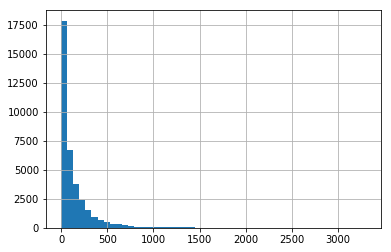

In [41]:
print('25-й перцентиль: {},'.format(perc25_dr), '75-й перцентиль: {},'.format(perc75_dr)
      , "IQR: {}, ".format(IQR_dr),"Границы выбросов: [{f_dr}, {l_dr}].".format(f_dr=perc25_dr - 1.5*IQR_dr, l_dr=perc75_dr + 1.5*IQR_dr))
data['rev_delta'].hist(bins = 50)

видим, что часть значений выходит за границы выбросов. заменим все значения больше 500 на медиану. так же заполним все пропуски медианным значением

In [42]:
data['rev_delta'] = data['rev_delta'].apply(lambda x : median_dr if x>500 else x)
data['rev_delta'] = data['rev_delta'].apply(lambda x : median_dr if pd.isna(x) else x)

### Посмотрим распределение целевой переменной

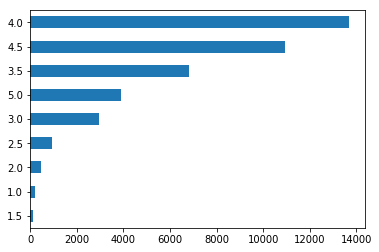

In [43]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

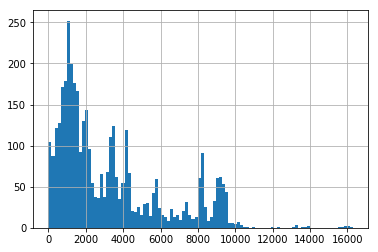

In [44]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

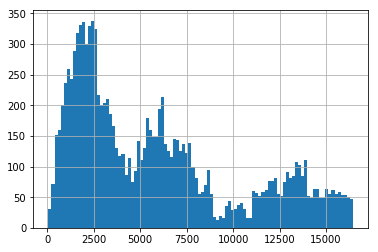

In [45]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

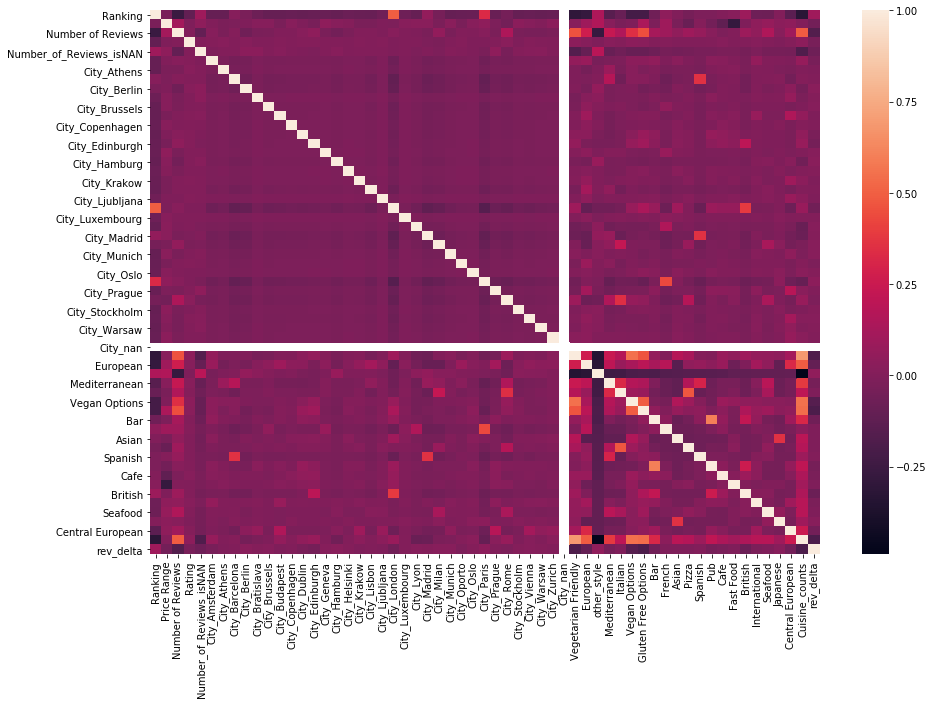

In [46]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [47]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [48]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
 ### заменяем пропуски на медианноое значение##
    df_output['Number of Reviews'] = df_output['Number of Reviews'].fillna(df_output['Number of Reviews'].median())
 
 ### заменяем пропуски на "other_style", считаем топ 20 кухонь и создаем новые признаки с назнаниями этих кухонь###
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: '\'other_style\'' if pd.isnull(x) else x[1:-1])
    from collections import Counter
    cuisines_count = Counter()
    for cuisine in df_output['Cuisine Style'].str.split(', '):
        cuisines_count += Counter(cuisine)
    cuisines_list = cuisines_count.most_common(20)
    cuisines_top = []
    for i in range (0, len(cuisines_list)):
        cuisines_top.append(cuisines_list[i][0][1:-1])
    
    def find_item(cell):
        if item in cell:
            return 1
        return 0

    for item in cuisines_top:
        df_output[item] = df_output['Cuisine Style'].apply(find_item)
  
 ### считаем количество кухнь у каждого ресторана и создаем новый признак###      
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: x.split(', ') )
    df_output['Cuisine_counts'] = df_output['Cuisine Style'].apply(lambda x: len(x))
    
  ### заменяем значения на последовательные числа###
    price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    df_output['Price Range'] = df_output['Price Range'].replace(to_replace=price_dict)
    df_output['Price Range'] = df_output['Price Range'].fillna(df_output['Price Range'].median())
  
  ### считаем количество дней между отзывами###
    df_output['rev_dates'] = df_output.Reviews.apply(lambda x : [0] if pd.isna(x) else x[2:-2].split('], [')[1][1:-1].split("', '"))
    df_output['max_rev_date'] = pd.to_datetime(df_output['rev_dates'].apply(lambda x: max(x)))
    df_output['first_rev'] = pd.to_datetime(df_output['rev_dates'].apply(lambda x : x[0]))
    df_output['second_rev'] = pd.to_datetime(df_output['rev_dates'].apply(lambda x: x[1] if len(x) == 2 else ''))
    df_output['rev_delta'] = np.abs(df_output['first_rev'] - df_output['second_rev'])
    df_output['rev_delta'] = df_output['rev_delta'].apply(lambda x: x.days)

    ### создаем dummy - признаки для городов ###
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    
    ### заменяем выбросы на медианное значение ###
    median = df_output['Number of Reviews'].median()
    df_output['Number of Reviews'] = df_output['Number of Reviews'].apply(lambda x : median if x>1000 else x)
    
    ### заменяем пропуски и выбросы на медианное значение ###
    median_dr = df_output['rev_delta'].median()
    df_output['rev_delta'] = df_output['rev_delta'].apply(lambda x : median_dr if x>500 else x)
    df_output['rev_delta'] = df_output['rev_delta'].apply(lambda x : median_dr if pd.isna(x) else x)

    
    ### удаляем лишние признаки###
    df_output.drop(['Restaurant_id','Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'max_rev_date', 'rev_dates', 'first_rev', 'second_rev'], axis = 1, inplace=True)

    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [49]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Vegetarian Friendly,European,other_style,Mediterranean,Italian,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
41959,8732.0,2.0,33.0,1,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
35778,1899.0,2.0,16.0,1,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10398,1744.0,2.0,12.0,1,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31907,618.0,2.0,24.0,1,5.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
23038,881.0,2.0,140.0,1,4.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44280,5049.0,2.0,36.0,1,4.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6696,1949.0,2.0,569.0,0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43823,8490.0,2.0,77.0,1,3.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
18807,1338.0,2.0,35.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46266,928.0,2.0,16.0,1,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 59 columns):
Ranking                50000 non-null float64
Price Range            50000 non-null float64
Number of Reviews      50000 non-null float64
sample                 50000 non-null int64
Rating                 50000 non-null float64
Vegetarian Friendly    50000 non-null int64
European               50000 non-null int64
other_style            50000 non-null int64
Mediterranean          50000 non-null int64
Italian                50000 non-null int64
Vegan Options          50000 non-null int64
Gluten Free Options    50000 non-null int64
Bar                    50000 non-null int64
French                 50000 non-null int64
Asian                  50000 non-null int64
Pizza                  50000 non-null int64
Spanish                50000 non-null int64
Pub                    50000 non-null int64
Cafe                   50000 non-null int64
Fast Food              50000 non-null int64
Bri

In [51]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [52]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [53]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 58), (40000, 58), (40000, 57), (32000, 57), (8000, 57))

# Model 
Сам ML

In [54]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [55]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [56]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [57]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21538937499999997


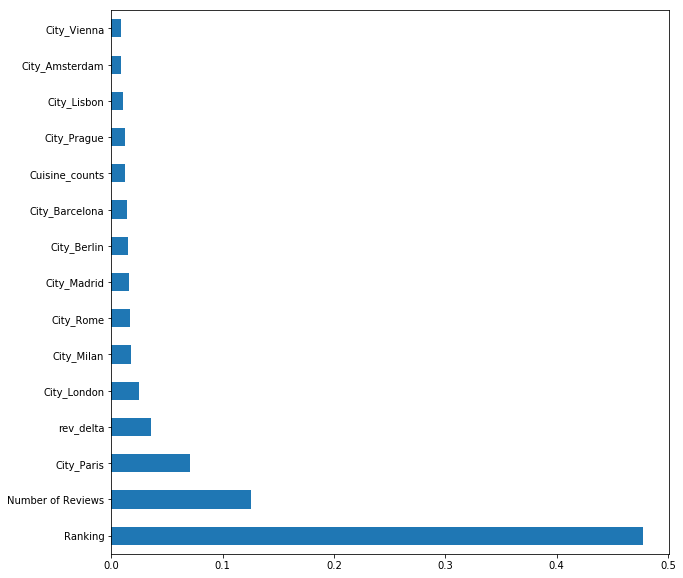

In [58]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [59]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Vegetarian Friendly,European,other_style,Mediterranean,Italian,Vegan Options,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
1504,5889.0,2.0,18.0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5709,9706.0,2.0,8.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2152,1089.0,2.0,33.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5219,959.0,2.0,5.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4392,4604.0,2.0,191.0,0.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1680,6296.0,2.0,14.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1272,3648.0,1.0,64.0,0.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3334,7842.0,2.0,10.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2853,1985.0,2.0,6.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3435,1445.0,2.0,33.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
test_data = test_data.drop(['Rating'], axis=1)

In [61]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [62]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [63]:
predict_submission

array([3.   , 4.36 , 4.44 , ..., 3.03 , 4.5  , 4.285])

In [64]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.000
1,id_1,4.360
2,id_2,4.440
3,id_3,4.380
4,id_4,4.510
5,id_5,4.360
6,id_6,1.955
7,id_7,2.555
8,id_8,4.135
9,id_9,4.550


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
